In [12]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## select important columns for analysis


In [40]:
df_T1 = pd.read_csv(r'../data/trucks/truck1.csv', index_col = "Time")

#### convert time col to datetime and view head of file, enough to view actual values.

In [51]:
df_T1.index = pd.to_datetime(df_T1.index)


In [71]:
list(df_T1.head())

['1730_CH9_ AutomaticStartStop',
 '1730_CH10_Truck_Batteries',
 '4649_Ch1_Alternator_250A',
 '4649_Ch2_BattOut_100A',
 '4649_Ch3_Trailer_50A',
 '4649_Ch4_Inverter_100A',
 '4649_Ch5_Fridge_50A',
 '4649_Ch6_200A_APU_BatteryBank',
 '4649_Ch7_200A_BatterySeparator',
 '4649_Ch8_APU_BatteryVoltage',
 'ActualEnginePercentTorque',
 'ActualEnginePercentTorqueHiRes',
 'AmbientAirTemperature_V',
 'asu_UreaTankTemp',
 'BarometricPressure_BB1_X_E',
 'BoostPressure',
 'CruiseCtrlSetSpeed',
 'DrvrDemandEngPercentTorque',
 'EngDemandPercentTorque',
 'EngDslPrtclateFilterIntakePress',
 'EngExhaustGasTemp',
 'EngineAirIntakeTemp_BB1_X_E',
 'EngineCoolantTemp_stat',
 'EngineKeyPosition',
 'EngineOilLevel',
 'EngineOilPressure',
 'EngineOilTemperature',
 'EnginePercentLoadAtCurrentSpd',
 'EngineSpeed',
 'EngIntakeManifold1Press',
 'EngIntakeManifold1Temp',
 'RoadInclinationVP15',
 'SteeringWheelAngle1',
 'TotalVehicleDistanceHighRes',
 'TransmissionOilTemp',
 'TransOilLevel',
 'TransOilPress',
 'tse_Turbo

In [72]:
cols =['1730_CH9_ AutomaticStartStop',
 '1730_CH10_Truck_Batteries',
 '4649_Ch1_Alternator_250A',
 '4649_Ch2_BattOut_100A',
 '4649_Ch3_Trailer_50A',
 '4649_Ch4_Inverter_100A',
 '4649_Ch5_Fridge_50A',
 '4649_Ch6_200A_APU_BatteryBank',
 '4649_Ch7_200A_BatterySeparator',
 '4649_Ch8_APU_BatteryVoltage','AmbientAirTemperature_V' ]


### describe the selected data

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


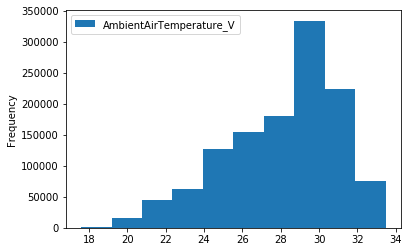

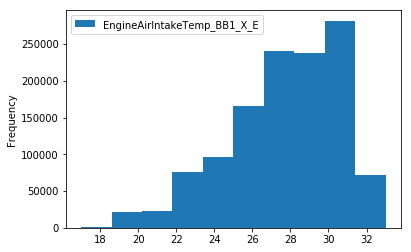

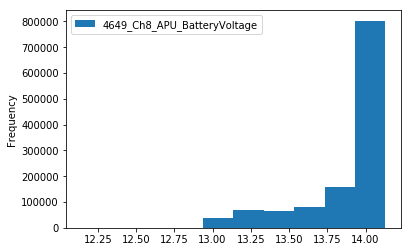

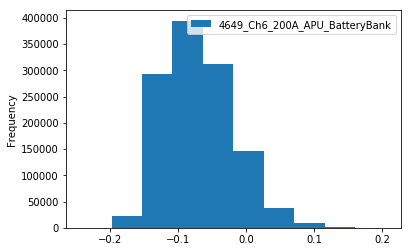

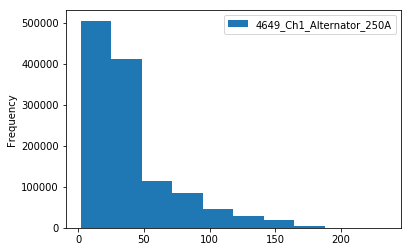

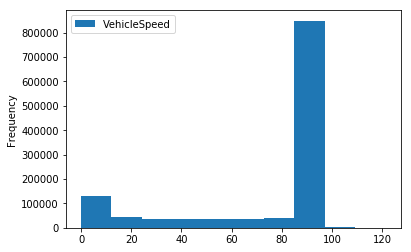

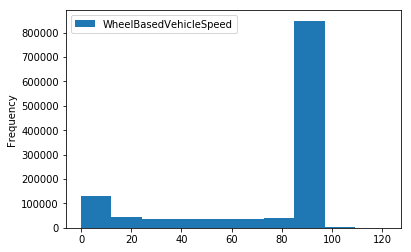

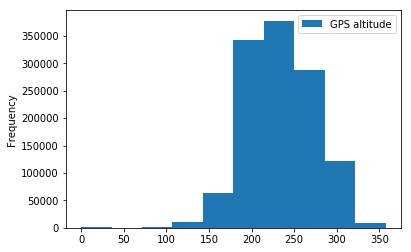

In [83]:
# df_T1.resample('D', on = 'Time').sum()
# for i in range(0, len(cols)):
#     fig,ax = plt.subplots(1,1, figsize=(10,10))
#     x = df_T1['Time']
#     y = df_T1[cols[i]]
#     plt.plot(x,y)
print(df_T1[['AmbientAirTemperature_V'
 ]].plot.hist(stacked=True))
print(df_T1[['EngineAirIntakeTemp_BB1_X_E'
 ]].plot.hist(stacked=True))
print(df_T1[['4649_Ch8_APU_BatteryVoltage'
 ]].plot.hist(stacked=True))
print(df_T1[['4649_Ch6_200A_APU_BatteryBank',
 ]].plot.hist(stacked=True))
print(df_T1[['4649_Ch1_Alternator_250A',
 ]].plot.hist(stacked=True))
print(df_T1[['VehicleSpeed'
 ]].plot.hist(stacked=True))
print(df_T1[['WheelBasedVehicleSpeed'
 ]].plot.hist(stacked=True))
print(df_T1[['GPS altitude'
 ]].plot.hist(stacked=True))